## This script generates the plots used for the ICML SSL workshop

In [33]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
results_root = '/home/cxx579/ssw/reports/epoch_exp/*.csv'
file_list = glob.glob(results_root)

In [3]:
test_df = pd.read_csv('/home/cxx579/ssw/reports/epoch_exp/oppo_flip_net_ft_100k_overall_10.csv')

In [4]:
test_df['id'] = test_df.index 

In [5]:
test_df

,precision,recall,f1,kappa,id
0,0.634367,0.739606,0.636494,0.546948,0
1,0.581541,0.639326,0.554002,0.433539,1
2,0.623226,0.688130,0.643382,0.498756,2
3,0.600050,0.678435,0.612403,0.449273,3


In [6]:
test_df['id'] = test_df.index 
new_df = pd.melt(test_df, id_vars=['id'])
new_df.drop(['id'], inplace=True, axis=1)

In [12]:
new_df.drop(['id'], inplace=True, axis=1)

In [13]:
new_df

,variable,value
0,precision,0.634367
1,precision,0.581541
2,precision,0.623226
3,precision,0.600050
4,recall,0.739606
5,recall,0.639326
6,recall,0.688130
7,recall,0.678435
8,f1,0.636494
9,f1,0.554002


In [15]:
file_list

['/home/cxx579/ssw/reports/epoch_exp/pamap_flip_net_ft_100k_overall_30.csv',
 '/home/cxx579/ssw/reports/epoch_exp/pamap_flip_net_ft_100k_overall_10.csv',
 '/home/cxx579/ssw/reports/epoch_exp/pamap_flip_net_ft_100k_overall_20.csv',
 '/home/cxx579/ssw/reports/epoch_exp/rowlands_flip_net_ft_100k_overall_20.csv',
 '/home/cxx579/ssw/reports/epoch_exp/oppo_flip_net_ft_100k_overall_10.csv',
 '/home/cxx579/ssw/reports/epoch_exp/oppo_flip_net_ft_100k_overall_50.csv',
 '/home/cxx579/ssw/reports/epoch_exp/rowlands_flip_net_ft_100k_overall_40.csv',
 '/home/cxx579/ssw/reports/epoch_exp/pamap_flip_net_ft_100k_overall_40.csv',
 '/home/cxx579/ssw/reports/epoch_exp/oppo_flip_net_ft_100k_overall_40.csv',
 '/home/cxx579/ssw/reports/epoch_exp/rowlands_flip_net_ft_100k_overall_50.csv',
 '/home/cxx579/ssw/reports/epoch_exp/rowlands_flip_net_ft_100k_overall_30.csv',
 '/home/cxx579/ssw/reports/epoch_exp/oppo_flip_net_ft_100k_overall_30.csv',
 '/home/cxx579/ssw/reports/epoch_exp/pamap_flip_net_ft_100k_overall_

In [14]:
master_df = []
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    dataset = file_name.split('_')[0]
    epoch_count = file_name.split('_')[-1][:2]
    
    current_df = pd.read_csv(file_path)
    
    current_df['id'] = current_df.index 
    current_df = pd.melt(current_df, id_vars=['id'])
    current_df.drop(['id'], inplace=True, axis=1)

    current_df['dataset'] = dataset
    current_df['epoch'] = epoch_count
    
    if len(master_df) == 0:
        master_df = current_df
    else:
        master_df = pd.concat([master_df, current_df])
master_df = master_df.rename(columns={"variable": "metric"}) 
master_df['epoch'] = master_df['epoch'].astype(int)

In [23]:
precision_df = master_df[(master_df['metric'] == 'precision') |  (master_df['metric'] == 'kappa') ]
recall_df = master_df[master_df['metric'] == 'recall']
f1_df = master_df[master_df['metric'] == 'f1']
kappa_df = master_df[master_df['metric'] == 'kappa']

In [25]:
precision_df

,metric,value,dataset,epoch
0,precision,0.772126,pamap,30
1,precision,0.789920,pamap,30
2,precision,0.777375,pamap,30
3,precision,0.807608,pamap,30
4,precision,0.787416,pamap,30
...,...,...,...,...
3,precision,0.588721,oppo,20
12,kappa,0.585236,oppo,20
13,kappa,0.491217,oppo,20
14,kappa,0.495374,oppo,20


In [31]:
sns.set_palette('colorblind')

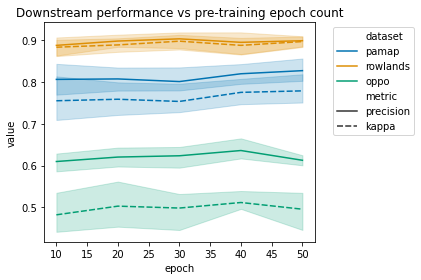

In [37]:
ax = plt.axes()

sns.lineplot(data=precision_df, x='epoch', y='value', hue='dataset', style='metric')

ax.set_title('Downstream performance vs pre-training epoch count')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('imgs/epoch.png', dpi=600)